# Combinatorial optimization with Rydberg quantum computers

This project will explore how quantum computers can be used to solve combinatorial optimization problems.


We will focus on two approaches: one with gate-based (aka digital) quantum computers, one with analog quantum computers (aka quantum simulators).



We will go through various steps:
1. convert the optimization problem to the search of the ground state of a Hamiltonian
Design a quantum algorithm to find the ground state
2. analog algorithms
3. gate-based algorithms


This will be done with Rydberg quantum computers, as described in the following research article: http://arxiv.org/abs/1808.10816.


## Quantum programming environment

To execute the quantum programs, you will need to install the Python library called **myQLM** on your laptop. It can be installed by running the command

``pip install myqlm``

Then, you need to clone the course's repository to have access to the notebook and some helper functions:

``git clone https://github.com/tayral/phy580_2025``

It is highly advised to use the online documentation of myQLM at https://myqlm.github.io.


Should you encounter problems with the installation (which may happen for Mac users using Anaconda), you can instead use "myBinder" to run the computations:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tayral/phy580_2025/)

... and open the ``combinatorial-optim-project.ipynb`` notebook.

## 1. The Hamiltonian of the Maximum Independent Set problem



<div class="alert alert-block alert-info">
    
- Describe the maximum independent set problem as a constrained optimization problem.
    
- How does one arrive at eq. (1)?
    
- What is the naive (classical) cost of computing the ground state of $H$?
</div>

Describe this Hamiltonian with a myQLM ``Observable`` object, called ``H_target``. Use the ``get_matrix`` method to get the matrix representation of $H_\mathrm{target}$. 

Hint: to create the Hamiltonian, you will need to first create a graph object. Use the ``networkx`` library to create such graphs. For simplicity, you can start by using "d-regular graphs".

<div class="alert alert-block alert-info">
What is its size as a function of the size of the graph?
</div>


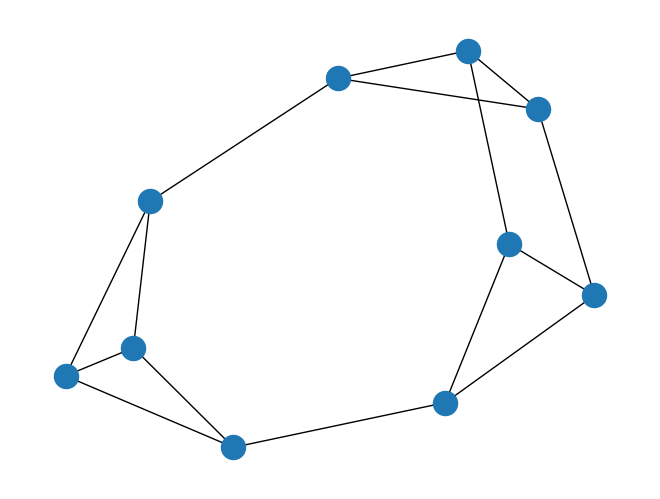

In [7]:
import networkx as nx

size = 10
d = 3 # degree
graph = nx.generators.random_regular_graph(d, size)
nx.draw(graph)


from qat.core import Observable

# H_target =  ...



## 2. Analog implementation for the Maximum Independent Set problem

### Part a: do the tutorial (analog_tutorial.ipynb)

It explains how to send "analog" jobs to QPUs.

### Part b: adapt it for the Rydberg situation

<div class="alert alert-block alert-info">
    
- In a Rydberg processor, what is the Hamiltonian $H_\mathrm{resource}$ that can be implemented in practice (find it in the article)?
    
- In the quantum adiabatic annealing method, what is the form $H_{QAA}$ of the time-dependent Hamiltonian that is needed? (what is $H_0$?)
    
- Are $H_\mathrm{resource}$ and $H_{QAA}$ identical?
</div>


Write a ``Schedule`` that represents $H_{QAA}$ (for now, without consideration for the difference with the available resource Hamiltonian). 


In [8]:
from qat.core import Schedule


## define the Schedule

### Part c: run the algorithm

Now, use a "QPU" to run the Schedule and measure H_target at the end.

In [10]:
from basic_qutip_qpu import QutipQPU

qpu = QutipQPU() # a classical emulator of an analog QPU

# create a quantum job with a schedule and observable to be measured at the end.

# res = qpu.submit(...)

#### Studying of the role of the various parameters

<div class="alert alert-block alert-info">
    
- What happens if you increase the annealing time? (this parameter is defined in the ``Schedule``object)
    
- How to read off the solution to the MIS problem? (Hint: use a job that samples the final distribution)
    
</div>

In [ ]:
# here, your code

#### More realistic simulation: with the true Hamiltonian of Rydbergs

Now, we want to actually use $H_\mathrm{resource}$. For this we can tune $\Delta(t)$ and $\Omega(t)$ (see Eq. (2) in the article) so that $H_\mathrm{resource}(t)$ looks similar to $H_{QAA}(t)$.

Remarks:

- in QA, the starting state needs to be the GS of $H_0$. In a Rydberg platform, the initial state is always $|0,0,\dots,0\rangle$. How to tune $\Delta(t=0)$ so that the ground state is indeed $|0,0,\dots,0\rangle$?

- in what types of graphs can Rydberg atoms actually implement?

In [ ]:
# here, your code

<div class="alert alert-block alert-info">
What do you observe?
</div>

### Part d: exact solution

To know how good our solution is, we need to find the optimal solution. Given $H_\mathrm{target}$, how do you extract the exact solution? What is the cost as a function of graph size?

### Going beyond unit-disk graphs


<div class="alert alert-block alert-info">

- Is it possible to handle graphs which are not unit-disk graphs? How so? What additional assumptions do you need on the hardware?
    
</div>

## 3. Gate-based implementation for the MIS problem


We now assume we can use the Rydberg atom platform as a digital (gate-based) platform.

<div class="alert alert-block alert-info">

- Under which conditions can one use a Rydberg platform as a gate-based quantum computer?

</div>


### QAOA algorithm


<div class="alert alert-block alert-info">
    
- Describe the QAOA algorithm for a general combinatorial optimization problem (look at appendix I.B.1 of the article)
    
- What is the role of parameter $p$?
    
- In your case, what energy are you tring to maximize?
    
- What is the form of the ansatz circuit?
    
</div>

We are now going to implement QAOA with myQLM.


#### Ansatz circuit

Using the same graph you used before (e.g the d-regular graph above), construct a parametric quantum circuit (see the documentation here: https://myqlm.github.io/02_user_guide/01_write/01_digital_circuit/02_variational.html)

In [ ]:
from qat.lang.AQASM import Program, H, RX

size = 10
d = 3 # degree
graph = nx.generators.random_regular_graph(d, size)

# prog = Program()
# ... create variables
# ... add gates depending on these variables

# var_circ = prog.to_circ()



### Optimization

In Qaptiva, the optimization is done with "plugins". They essentially perform the optimization of the parameters for a given cost function.

In [2]:
#### solution 
from qat.qpus import get_default_qpu
from qat.plugins import ScipyMinimizePlugin

qpu = get_default_qpu() # a classical emulator of gate-based QPUs.
plugin = ScipyMinimizePlugin(method="COBYLA",
                            tol=1e-5, 
                            options={"maxiter": 200})
stack = plugin | qpu

job = var_circ.to_job(observable = H_target) 
result = stack.submit(job)
print("Final energy:", result.value)

Could not import qat.qpus.MPSLegacy from qat.mps.legacy.qpu:MPSLegacy: some __qlm_importables__ are incorrect!
Could not import qat.qpus.MPS from qat.mps.mps_qpu:MPSQPU: some __qlm_importables__ are incorrect!
Could not import qat.qpus.MPO from qat.mps.mps_qpu:MPOQPU: some __qlm_importables__ are incorrect!
Could not import qat.qpus.MPSLegacy from qat.mps.legacy.qpu:MPSLegacy: some __qlm_importables__ are incorrect!
Could not import qat.qpus.MPS from qat.mps.mps_qpu:MPSQPU: some __qlm_importables__ are incorrect!
Could not import qat.qpus.MPO from qat.mps.mps_qpu:MPOQPU: some __qlm_importables__ are incorrect!
Could not import qat.qpus.MPSLegacy from qat.mps.legacy.qpu:MPSLegacy: some __qlm_importables__ are incorrect!
Could not import qat.qpus.MPS from qat.mps.mps_qpu:MPSQPU: some __qlm_importables__ are incorrect!
Could not import qat.qpus.MPO from qat.mps.mps_qpu:MPOQPU: some __qlm_importables__ are incorrect!


Final energy: -10.875831493417081


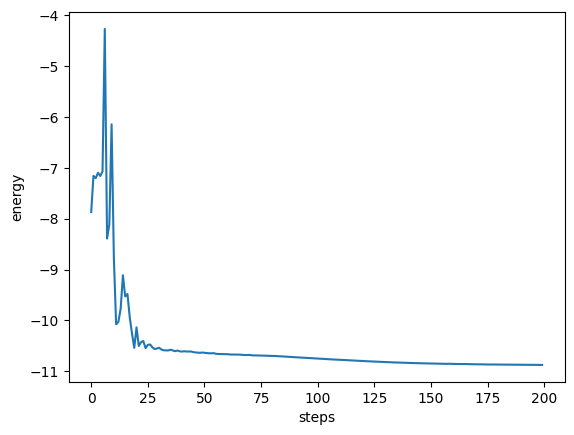

In [3]:
import matplotlib.pyplot as plt
plt.plot(eval(result.meta_data["optimization_trace"]))
plt.xlabel("steps")
plt.ylabel("energy")
plt.show()

### Reading off the solution

The QAOA procedure yields a value of the optimized parameters, contained in the ``result`` variable (see ``result.meta_data`` field). We now want to recover the state corresponding to these optimized parameters, so that we can read the solution to the UDMIS problem.

For this, we need to evaluate our parameterized quantum circuit ``var_circ`` on the optimized values of the variables.
This can be achieved like this: if a circuit has a single variable ``toto``, then replacing occurrences of ``toto`` by its value (say 5) can be done via:

```python
dic = {"toto" : 5.0}
circ = var_circ(**dic)
```

In [11]:
# retrieving the parameters
# replacing in var_circ
# executing the circ on the QPU in "SAMPLE" mode (no observables)

## 4. Conclusions

<div class="alert alert-block alert-info">

- What are the respective advantages and drawbacks of QA (analog) and QAOA (gate-based)?
    
- Compared to the exact solution, how do quantum algorithms fare?

</div>

## 5. Going beyond

- Here, we have used for simplicity d-regular graphs. Repeat the experiments on actual unit-disk graphs (for this, think how to generate random unit-disk graphs

- What do you expect the role of decoherence to be in both cases?